/home/andreasstillits/coding/Leaves1D/data/saved_data


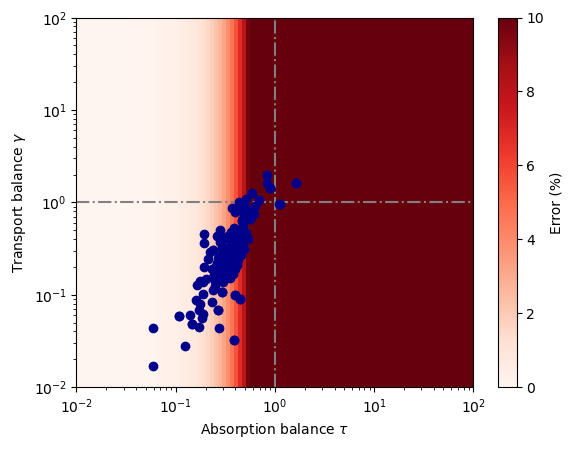

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 



N = 100
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))
taus = np.exp(np.linspace(np.log(0.01), np.log(100), N))
error = np.ones((N,N))

for i, gamma in enumerate(gammas):
    error[i,:] = 100*(taus/np.tanh(taus) - 1)

%cd "/home/andreasstillits/coding/Leaves1D/data/saved_data"

df = pd.read_csv("Knauer2022_hypostomatous.csv", decimal=',', sep=';')


map = plt.pcolor(taus, gammas, error, shading="nearest", cmap="Reds", vmin=0, vmax=10)
plt.plot([1, 1], [0.01, 100], color="grey", linestyle='-.', zorder=2)
plt.plot([0.01, 100], [1, 1], color="grey", linestyle='-.', zorder=2)
plt.scatter(df['tau'], df['gamma'], color="darkblue", marker="o", zorder=3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01, 100)
plt.xlim(0.01, 100)
plt.colorbar(map, label='Error (%)')
plt.xlabel(r'Absorption balance $\tau$')
plt.ylabel(r'Transport balance $\gamma$')
plt.show()


In [14]:
def get_tau_and_fraction(data: pd.DataFrame, threshold: float = 0.05) -> None:
    taus = np.exp(np.linspace(np.log(0.01), np.log(100), 1000))
    error = taus/np.tanh(taus) - 1 
    idx = np.argwhere(error > threshold)[0][0]
    num_points = np.sum(data["tau"] > taus[idx])
    print(f"Error exceeds {threshold*100:.0f}% for tau > {taus[idx]:.2f}")
    print(f"Fraction of data points with tau > {taus[idx]:.2f}: {100*num_points/len(data):.0f}%", "\n")
    


get_tau_and_fraction(df, threshold=0.05)
get_tau_and_fraction(df, threshold=0.10)

Error exceeds 5% for tau > 0.39
Fraction of data points with tau > 0.39: 38% 

Error exceeds 10% for tau > 0.56
Fraction of data points with tau > 0.56: 7% 

